In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fdi_data = pd.read_csv(r'FDI_data.csv')

In [4]:
fdi_data

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,0.00,0.00,6.30,0.00,0.06,9.90,20.04,35.54,31.61,70.51,36.63,47.39,14.34,113.78,72.58,122.81,53.17
59,COIR,0.00,0.00,0.00,0.00,0.47,0.59,0.04,0.01,0.00,0.25,0.10,0.55,0.15,0.54,1.36,0.00,0.00
60,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,0.00,0.00,0.00,0.00,0.00,0.93,64.06,182.92,172.70,324.56,675.07,386.28,283.89,485.37,870.25,4510.71,1860.73
61,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",24.33,51.75,36.10,47.04,152.06,228.71,1392.95,3887.33,4657.51,5466.13,1663.03,3140.78,1332.49,1226.05,769.14,112.55,105.14


In [5]:
df_unpivoted = fdi_data.melt(id_vars=['Sector'], var_name='Date', value_name='USD($)')

In [6]:
df_unpivoted.sample(10)

,Sector,Date,USD($)
244,AGRICULTURE SERVICES,2003-04,0.59
908,SCIENTIFIC INSTRUMENTS,2014-15,32.34
156,PHOTOGRAPHIC RAW FILM AND PAPER,2002-03,0.60
39,"SOAPS, COSMETICS & TOILET PREPARATIONS",2000-01,0.00
215,SCIENTIFIC INSTRUMENTS,2003-04,0.02
677,DEFENCE INDUSTRIES,2010-11,0.00
915,"TEXTILES (INCLUDING DYED,PRINTED)",2014-15,197.42
508,COAL PRODUCTION,2008-09,0.22
507,NON-CONVENTIONAL ENERGY,2008-09,125.88
302,HOSPITAL & DIAGNOSTIC CENTRES,2004-05,26.19


C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='USD($)', ylabel='Density'>

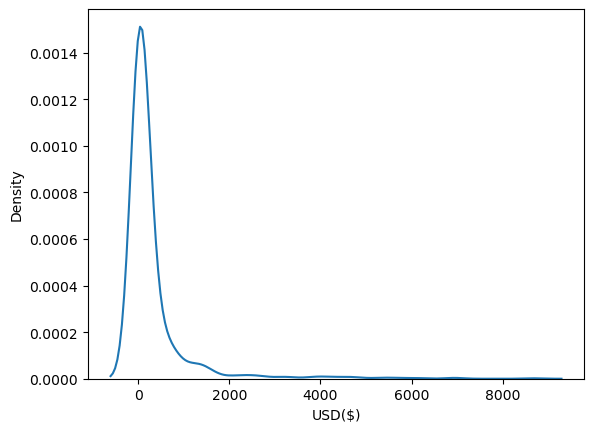

In [7]:
sns.kdeplot(data=df_unpivoted,x='USD($)')

In [8]:
df_unpivoted['Sector'].unique().shape

(63,)

In [9]:
df_unpivoted.isnull().sum()

Sector    0
Date      0
USD($)    0
dtype: int64

In [10]:
df_unpivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sector  1071 non-null   object 
 1   Date    1071 non-null   object 
 2   USD($)  1071 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
df_unpivoted['Year'] = df_unpivoted['Date'].str.split('-').str[0]

In [13]:
df_unpivoted['Value In Rupees'] = round(df_unpivoted['USD($)']*83.46,2)

In [17]:
top_sectors = df_unpivoted.groupby('Sector')['Value In Rupees'].mean().sort_values(ascending = False).reset_index()
top_sectors

,Sector,Value In Rupees
0,"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...",291994.580000
1,COMPUTER SOFTWARE & HARDWARE,121112.684706
2,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",119264.781176
3,TELECOMMUNICATIONS,117560.823529
4,AUTOMOBILE INDUSTRY,81859.139412
...,...,...
58,PHOTOGRAPHIC RAW FILM AND PAPER,330.305294
59,COAL PRODUCTION,136.187059
60,"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",39.177059
61,DEFENCE INDUSTRIES,25.136471


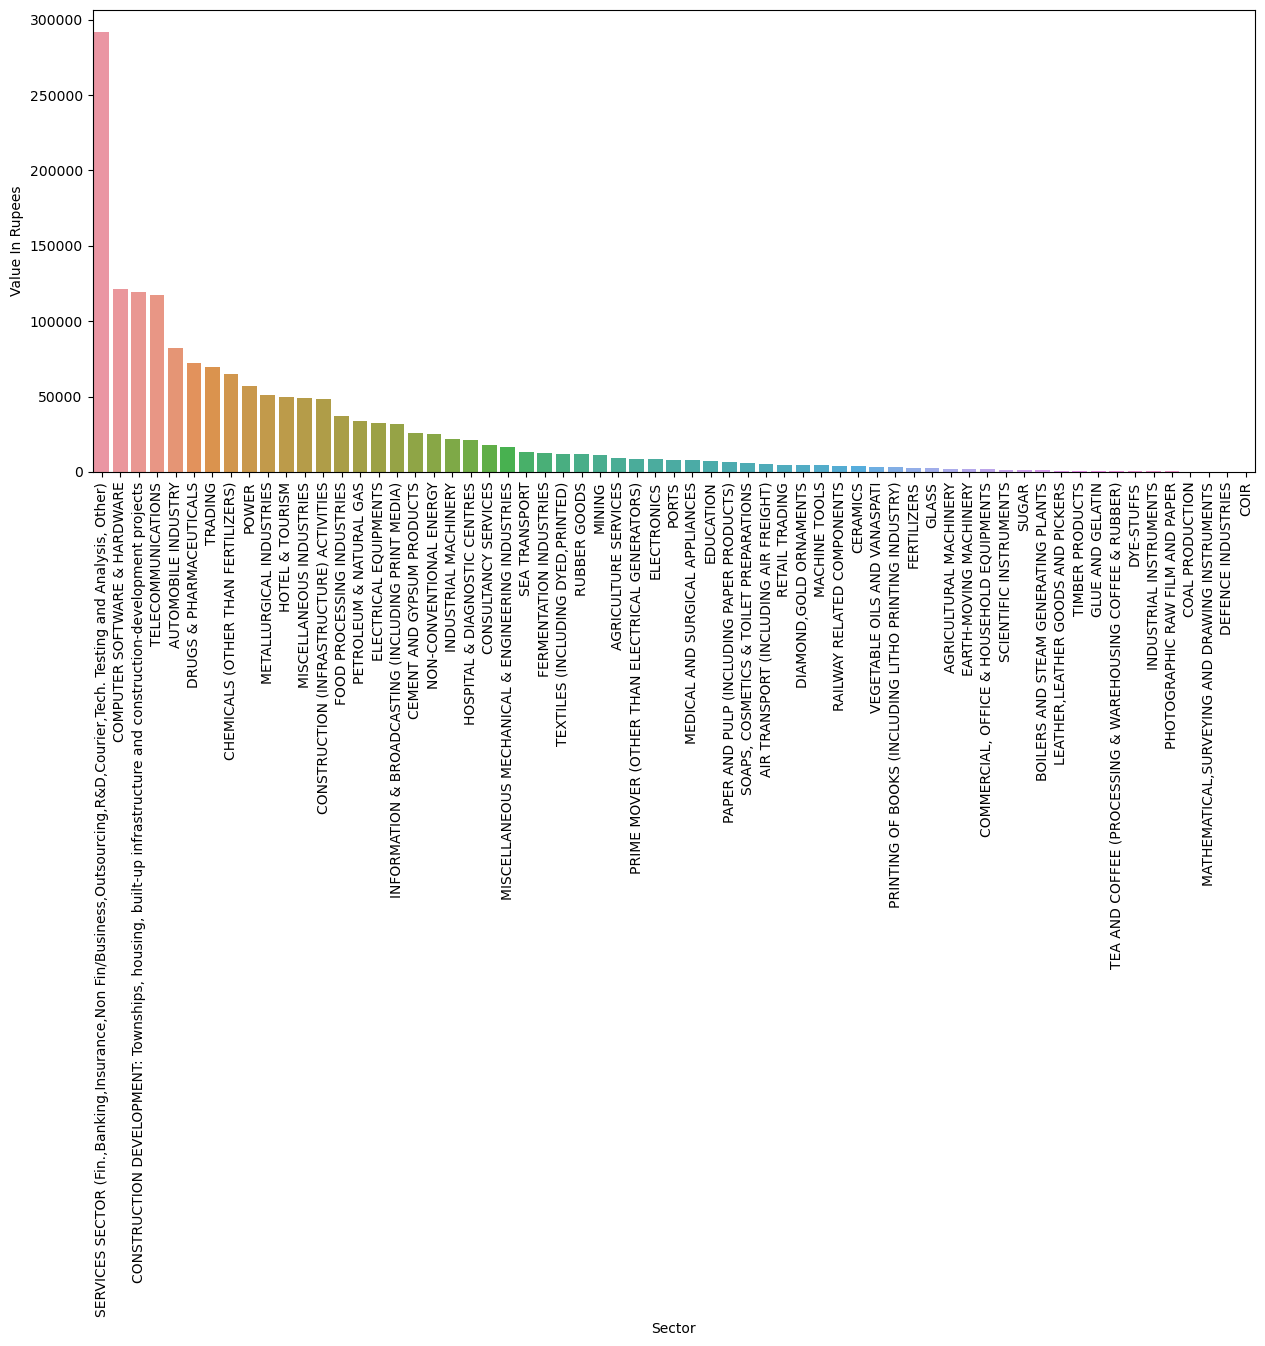

In [15]:
plt.figure(figsize=(15,6))
#sns.scatterplot(data=top_sectors,x='Value In Rupees',y='Sector', jitter=True)
sns.barplot(data=top_sectors, x='Sector', y='Value In Rupees')
plt.xticks(rotation=90)
plt.show()

In [21]:
avg_rupees_invested = df_unpivoted.groupby('Year')['Value In Rupees'].sum().sort_values(ascending = False).reset_index()
avg_rupees_invested

,Year,Value In Rupees
0,2016,3628695.59
1,2015,3338482.65
2,2011,2931180.31
3,2008,2620306.75
4,2014,2581457.04
5,2009,2156137.33
6,2007,2051062.86
7,2013,2028021.27
8,2012,1871472.84
9,2010,1784630.98


In [ ]:
sector_category = df_unpivoted.groupby(['Year','Sector'])['Value In Rupees'].mean().sort_values(ascending = False).reset_index()
sector_category

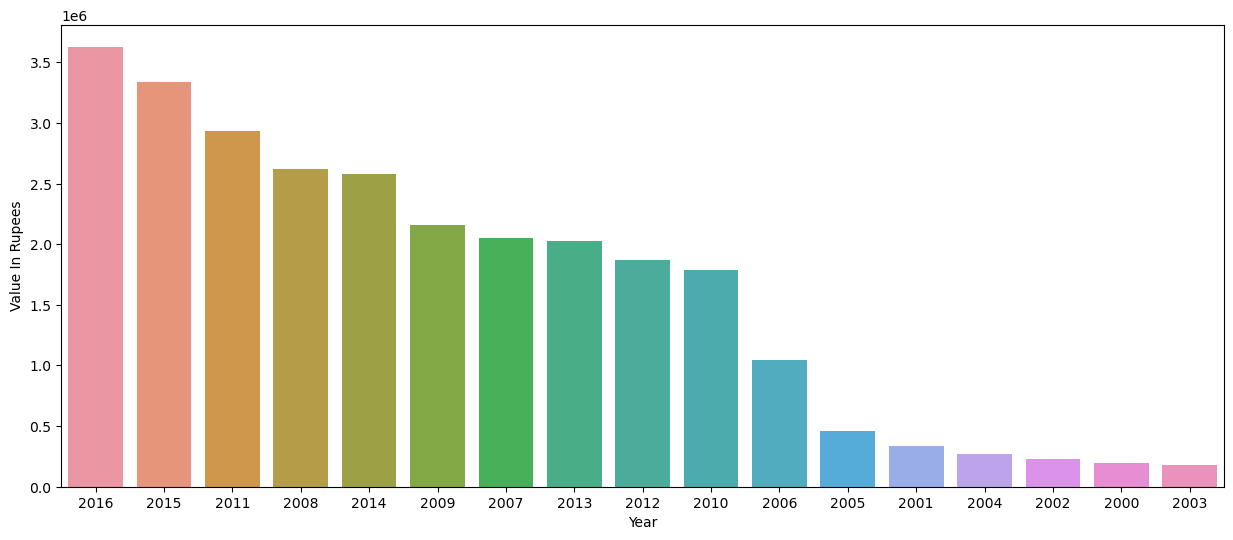

In [22]:
plt.figure(figsize=(15,6))
#sns.scatterplot(data=top_sectors,x='Value In Rupees',y='Sector', jitter=True)
sns.barplot(data=avg_rupees_invested, x='Year', y='Value In Rupees')
#plt.xticks(rotation=90)
plt.show()

In [30]:
invested_sectors = df_unpivoted[df_unpivoted['Value In Rupees'] > 0]

C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


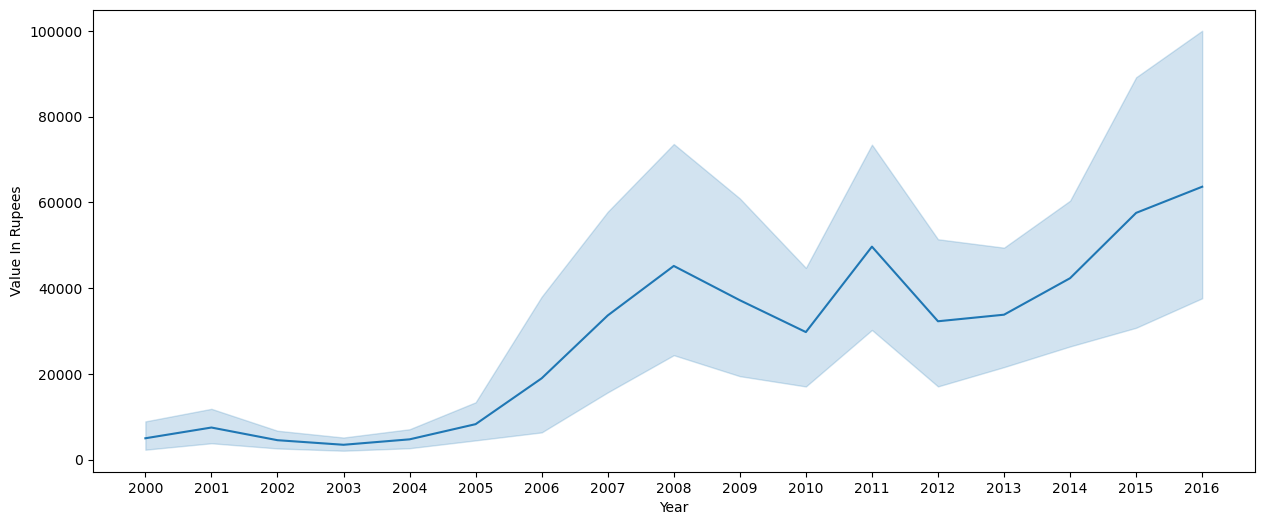

In [38]:
plt.figure(figsize=(15,6))
#sns.scatterplot(data=top_sectors,x='Value In Rupees',y='Sector', jitter=True)
sns.lineplot(data=invested_sectors, x='Year', y='Value In Rupees',markers=True)
#plt.xticks(rotation=90)
plt.show()

In [38]:
df_unpivoted['Year'].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [71]:
# No investment in these Sectors 
not_invested_sectors = df_unpivoted[df_unpivoted['USD($)'] == 0]

C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


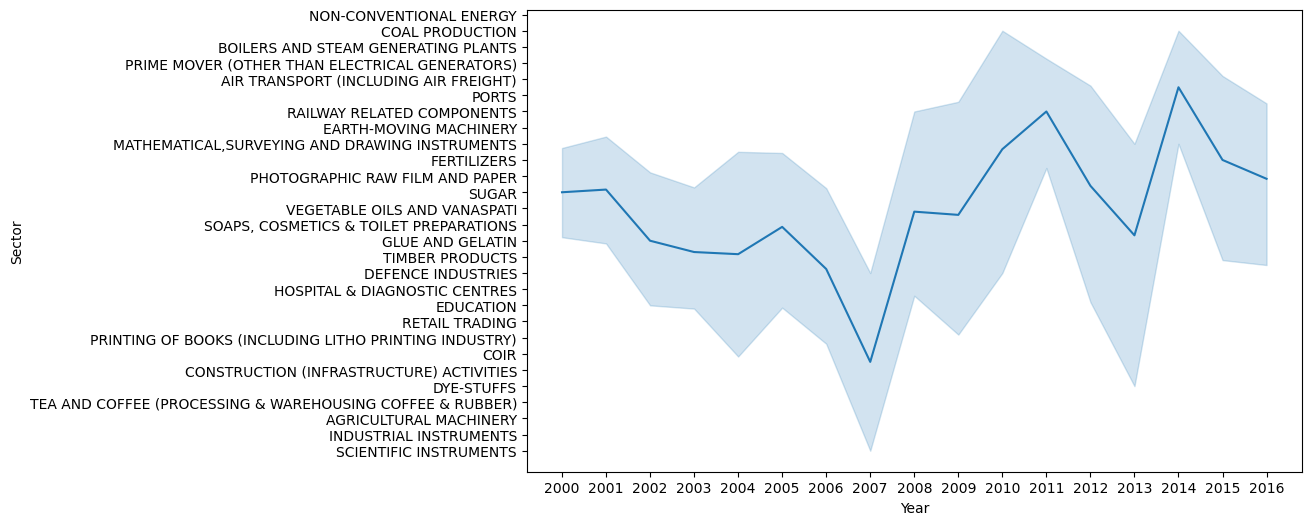

In [103]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=not_invested_sectors,x='Year',y='Sector')
plt.show()